## Purpose of the notebook
1. Explore the 4 classes of hearbeats
    * What does the average beat in each class look  like?
    * How much variation is there at different points of a heatbeat?
    * Does the average heartbeat of a patient look like the average heartbeat of the whole dataset or are there patient-specific variations?
    * What could be possible causes of intraclass variance?
    * Can we apply a transformation to reduce it?
2. Explore dimmensionality reduction techniques PCA and LDA
    * can we successfully visualize 4 differnt classes with PCA or LDA?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
import wfdb
import os
import sys
# the code for feature processing and plotting functions has been refactored into module feature_extraction_funcs
sys.path.insert(0, os.path.abspath('../../src/'))
import feature_extraction_funcs as fef 

In [7]:
import importlib
importlib.reload(fef)

<module 'feature_extraction_funcs' from '/Users/zhannahakhverdyan/Springboard/Capstone2/src/feature_extraction_funcs.py'>

In [42]:
# compile a dataset of raw signal for each labeled heartbeat in all records. Signal interval is 1 second.
raw_labeled_beat_full_df = fef.process_whole_dataset(fef.path, fef.file_list, 1, 'raw')
len(raw_labeled_beat_full_df)

100718

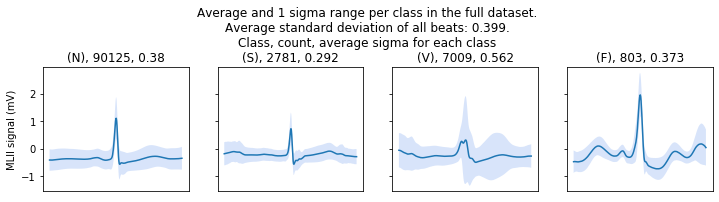

In [56]:
# Plot the average +/- 1 standard deviation at each point for the 4 classes
fef.plot_ave_std(raw_labeled_beat_full_df, 'full dataset')
plt.savefig('../../Images/class_explor_full_raw.png', format='png')

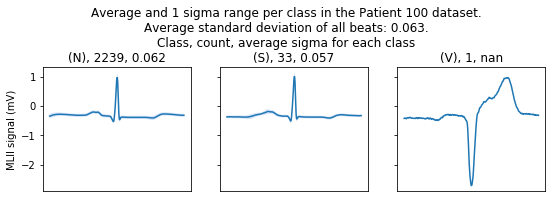

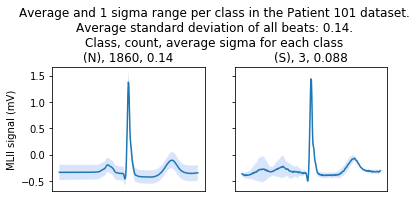

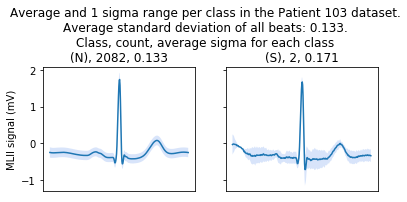

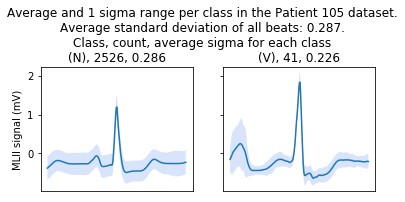

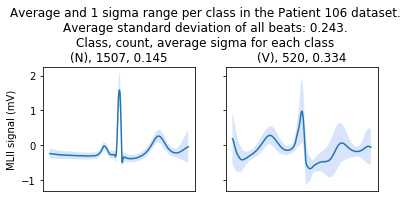

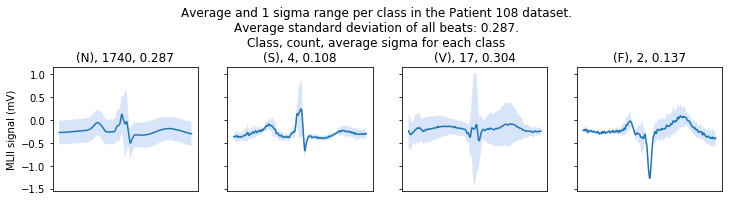

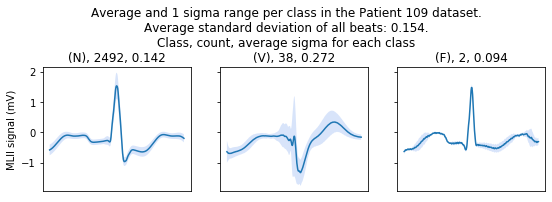

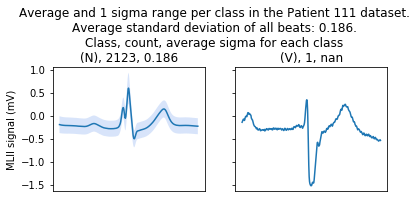

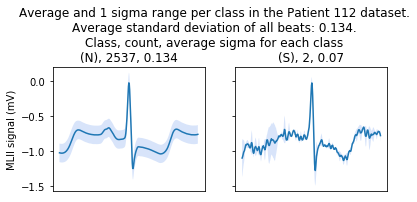

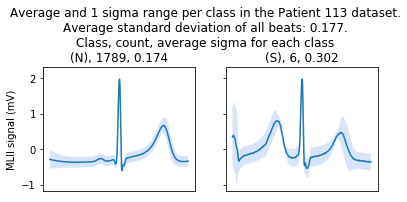

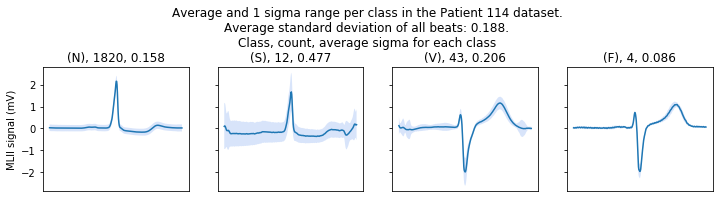

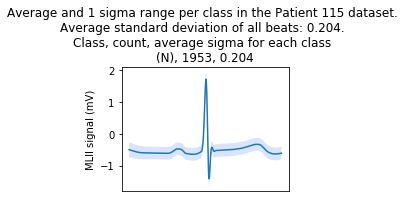

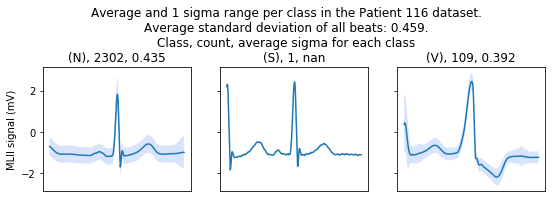

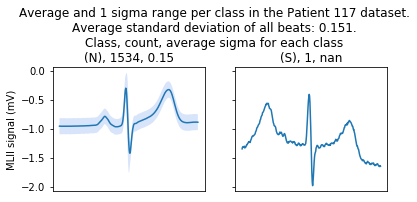

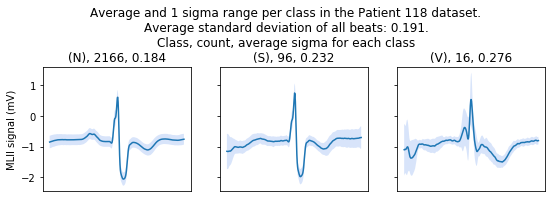

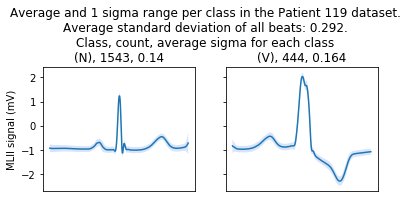

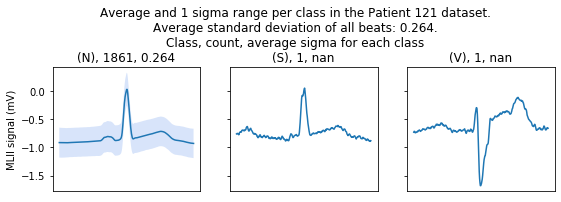

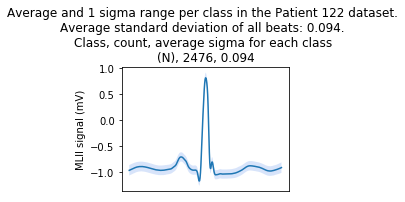

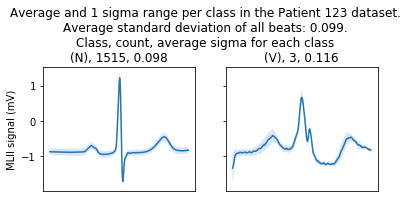

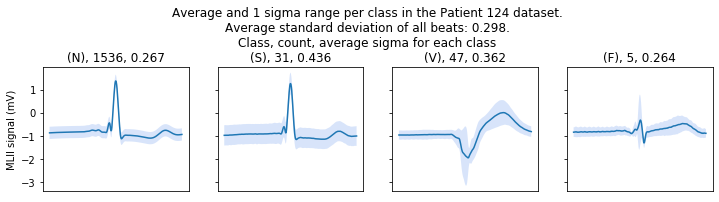

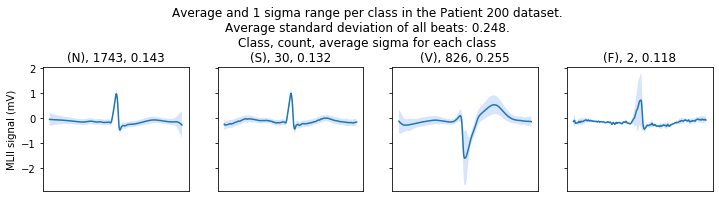

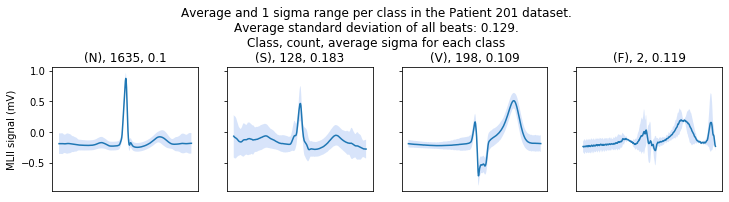

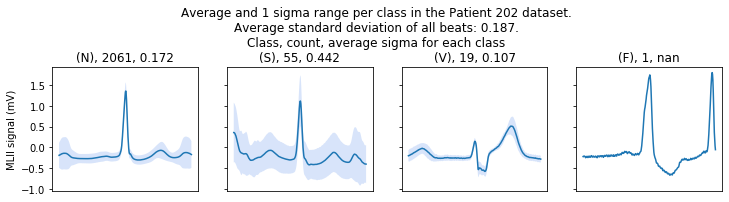

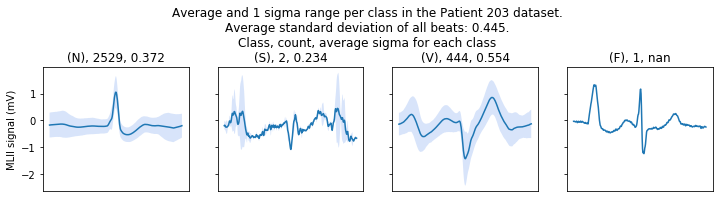

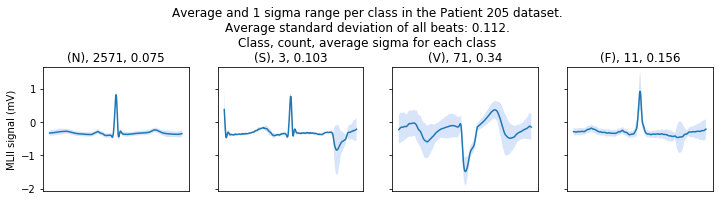

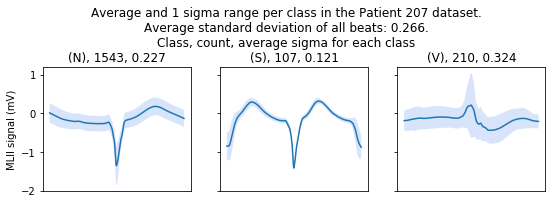

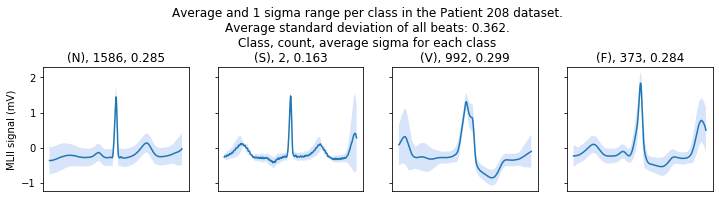

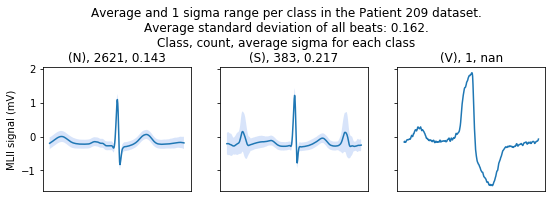

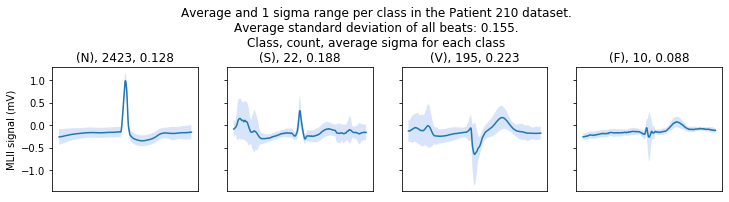

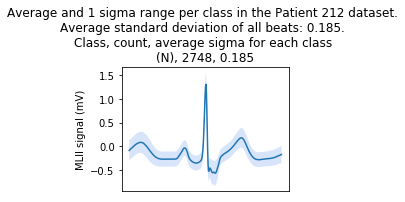

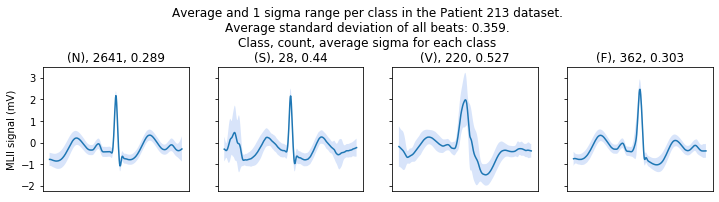

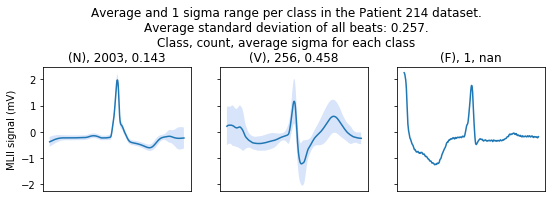

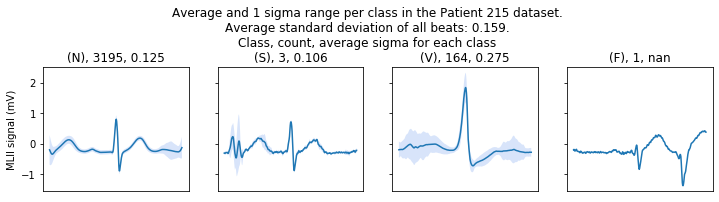

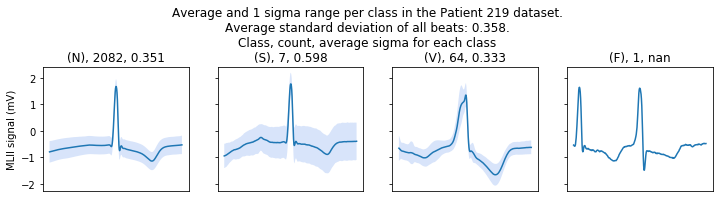

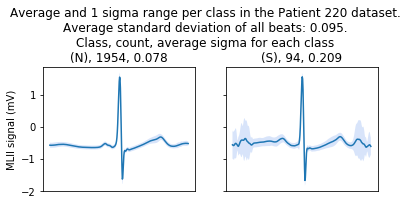

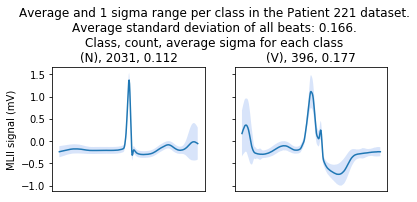

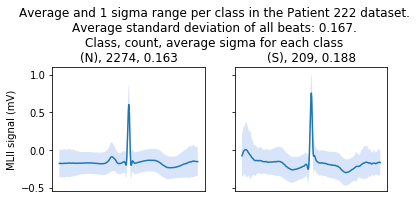

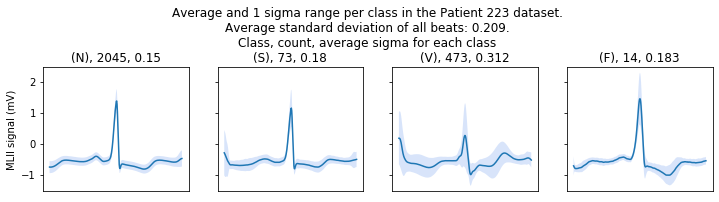

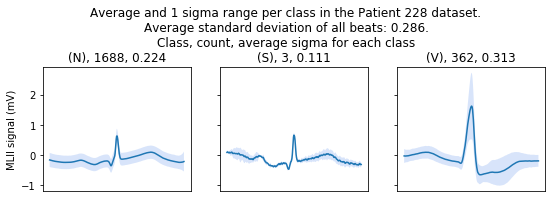

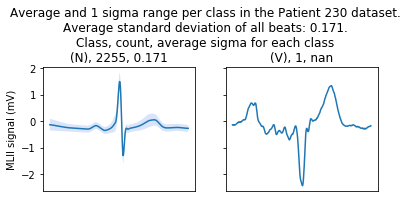

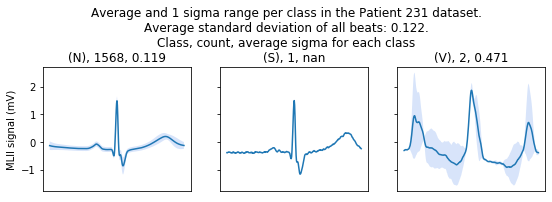

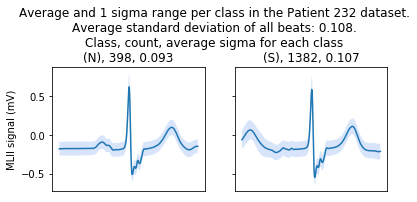

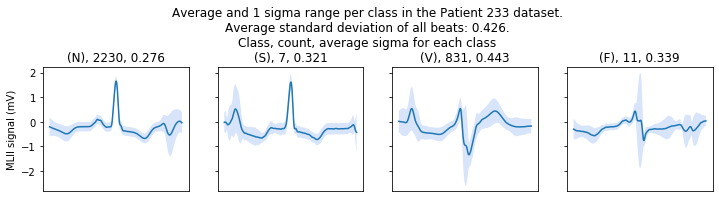

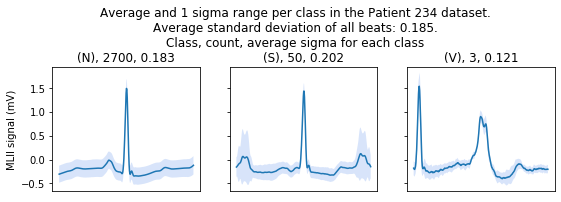

In [57]:
# compile a dataset of raw signal for each labeled heartbeat in a single record. Signal interval is 1 second.
# Plot the average +/- 1 standard deviation at each point for the 4 classes
# repeat for all records
for file in fef.file_list:
    dataset = fef.process_one_record(fef.path, file, 1, 'raw')
    fef.plot_ave_std(dataset, "Patient "+file+" dataset")
    plt.show()

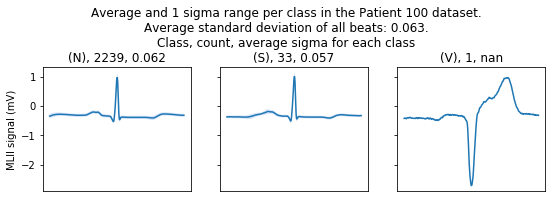

In [58]:
# save average signal plot for record 100. Notice the peak inversion for the V class.
dataset = fef.process_one_record(fef.path, '100', 1, 'raw')
fef.plot_ave_std(dataset, "Patient "+'100'+" dataset")
plt.savefig('../../Images/class_explor_100.png', format='png')
plt.show()

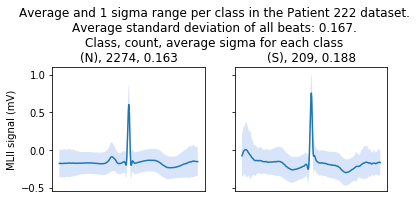

In [59]:
# save average signal plot for record 222. Notice larger standard deviation compared to record 100.
dataset = fef.process_one_record(fef.path, '222', 1, 'raw')
fef.plot_ave_std(dataset, "Patient "+'222'+" dataset")
plt.savefig('../../Images/class_explor_222.png', format='png')
plt.show()

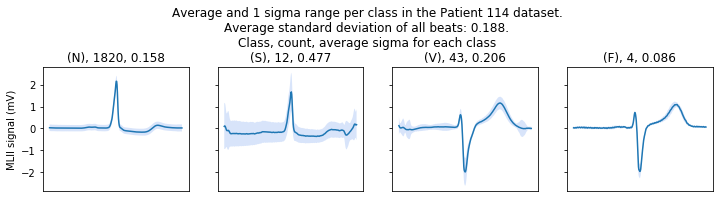

In [60]:
# save average signal plot for record 114. Notice the peak inversion for classes V and F.
dataset = fef.process_one_record(fef.path, '114', 1, 'raw')
fef.plot_ave_std(dataset, "Patient "+'114'+" dataset")
plt.savefig('../../Images/class_explor_114.png', format='png')
plt.show()

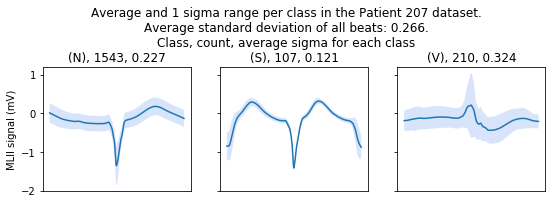

In [61]:
# save average signal plot for record 207. Notice the peak inversion for classes N and S.
dataset = fef.process_one_record(fef.path, '207', 1, 'raw')
fef.plot_ave_std(dataset, "Patient "+'207'+" dataset")
plt.savefig('../../Images/class_explor_207.png', format='png')
plt.show()

### QRS peak inversion is causing some of the intraclass variability in the data. Reduce this variation by taking the absolute value.

In [2]:
# Complile a new dataset with absolute value of the signal, 1 beat per row, for all records.
abs_raw_labeled_beat_full_df = fef.process_whole_dataset(fef.path, fef.file_list, 1, 'raw_abs')
len(abs_raw_labeled_beat_full_df)

100718

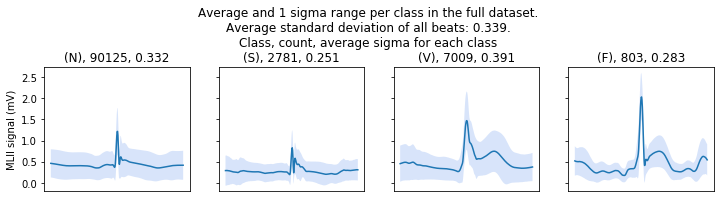

In [62]:
# plot the average and standard deviation for the new dataset - absolute value of the raw signal.
fef.plot_ave_std(abs_raw_labeled_beat_full_df, 'full dataset')
plt.savefig('../../Images/class_explor_full_abs.png', format='png')

### Variation within each class went down after the absolute value transformation. Another source of intraclass variation is the baseline drift. While there are frequency subtraction based techniques for reducing the baseline drift those are computationally expensive and may affect the real signal. A simple strategy to eliminate the baseline drift is to consider the differnce beteen two data points instead of the absolute value of the data points. Transform the signal by taking the difference between each consecutive pairs of points. In this case we will apply the difference function after taking the absolute value of the signal (to correct for peak inversion).

In [3]:
# take absolute value, then apply the difference function, compile a dataset, 1 beat per row for all records.
abs_dif_labeled_beat_full_df = fef.process_whole_dataset(fef.path, fef.file_list, 1, 'dif_abs')
len(abs_dif_labeled_beat_full_df)

100718

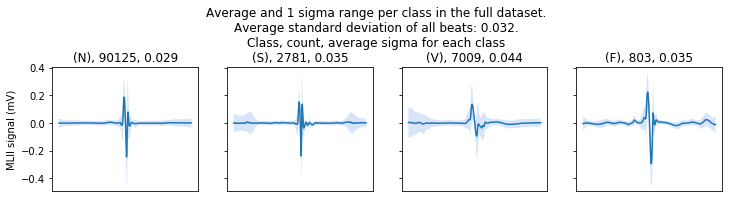

In [106]:
# plot and save the average +/- 1 standard deviation for each class.
fef.plot_ave_std(abs_dif_labeled_beat_full_df, 'full dataset')
plt.savefig('../../Images/class_explor_full_dif_abs.png', format='png')

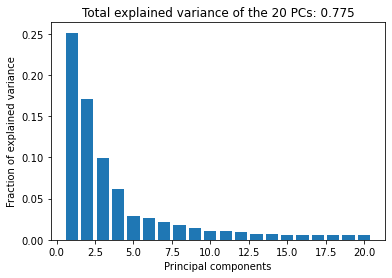

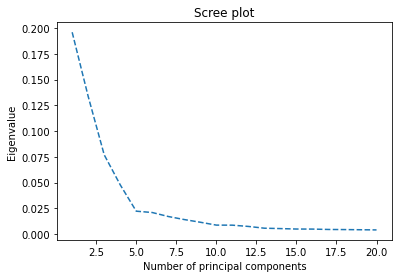

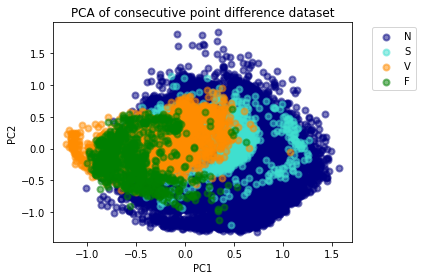

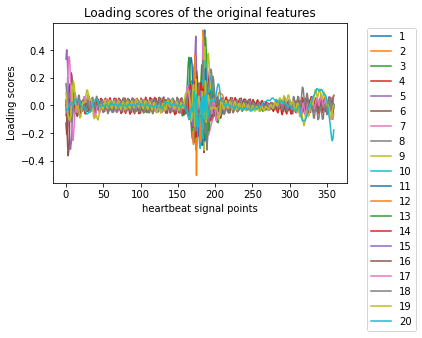

In [8]:
fef.pca_analysis(abs_dif_labeled_beat_full_df, 'consecutive point difference')

## PCA interpretation
Based on the scree plot, all eiganvalues are < 1, this means that all principle components contribute a little bit, but no component contributes considerably. Hence, PCA does not work well for this dataset. 
This can also be seen on the PCA score plot. All 4 classes overlap, so PCA is also not useful for class visualization.
Finally, the loading scores for the 360 original features (1 hartbeat) essentially look like the original dataset, with most variation around 180 (QRS complex).

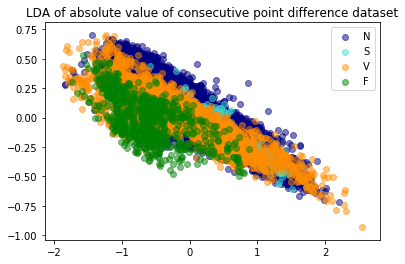

In [111]:
fef.lda_analysis(abs_dif_labeled_beat_full_df, 'absolute value of consecutive point difference')

LDA still produced a significant overlap between the three classes, hence it will not be usefula for classification.

In [112]:
abs_dif_labeled_beat_full_df.to_csv('../../Data_processed/dif_abs_value_full_040720.csv')

In [113]:
train, test = fef.split_train_test(abs_dif_labeled_beat_full_df, fef.train, fef.test)
train.to_csv('../../Data_processed/dif_abs_value_train_040720.csv')
test.to_csv('../../Data_processed/dif_abs_value_test_040720.csv')